# Part I - (Loan Data from Prosper)
## by (Hanan Awad)

## Introduction

> Introduce the dataset

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
(The Loan Data from Prosper dataset is a rich and comprehensive dataset that contains detailed information about loans issued through Prosper, a peer-to-peer lending platform. Prosper allows individuals to borrow money from other individuals, bypassing traditional financial institutions. This dataset offers valuable insights into various aspects of the lending and borrowing process.)

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?
Dataset Structure
The dataset consists of 113,937 loans with 81 variables for each loan. These variables include:
Here is a breakdown of its structure:

Unique Identifiers: ListingKey, LoanKey, ListingNumber, MemberKey


Loan Information: LoanOriginalAmount, LoanStatus, LoanOriginationDate, LoanTerm, LoanClosedDate

Borrower Information: BorrowerRate, BorrowerAPR, StatedMonthlyIncome, EmploymentStatus, IsBorrowerHomeowner, BorrowerState

Credit Information: CreditScoreRangeLower, CreditScoreRangeUpper, DebtToIncomeRatio, DateCreditPulled

Prosper Ratings and Scores: ProsperRating (numeric), ProsperRating (Alpha), ProsperScore

Loan Purpose: ListingCategory

### What is/are the main feature(s) of interest in your dataset?

### Main Features of Interest

Based on the provided variables, the main features of interest in the Loan Data from Prosper dataset are:

1. **Loan Amount (`LoanOriginalAmount`)**:
   - Understanding the distribution and trends in borrowing amounts.

2. **Borrower Rate (`BorrowerRate`)**:
   - Analyzing interest rates charged and their effect on loan performance.

3. **Loan Status (`LoanStatus`)**:
   - Investigating the current state of loans to evaluate default rates and overall loan health.

4. **Prosper Rating (`ProsperRating`)**:
   - Assessing borrower risk levels and their impact on loan outcomes.

5. **Borrower Income (`StatedMonthlyIncome`)**:
   - Exploring the relationship between borrower income and loan characteristics.

6. **Debt-to-Income Ratio (`DebtToIncomeRatio`)**:
   - Evaluating borrower financial stability and its influence on loan performance.

These features will provide a comprehensive understanding of loan dynamics and borrower behavior, allowing for meaningful analysis and visualization of key trends and relationships in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

ased on the Prosper loan dataset, the following features will be crucial for investigating your areas of interest:

Loan Amount (LoanOriginalAmount): Analyzes borrowing trends.


Borrower Rate (BorrowerRate): Assesses interest rate impact.

Loan Status (LoanStatus): Provides insights on loan performance.

Prosper Rating (ProsperRating): Evaluates borrower risk.

Borrower Income (StatedMonthlyIncome): Examines financial background.

Employment Status (EmploymentStatus): Influences borrowing behavior.

Debt-to-Income Ratio (DebtToIncomeRatio): Evaluates financial stability.

Term (Term): Analyzes loan duration impact.

Listing Category (ListingCategory): Segments by loan purpose.

Credit Score (CreditScoreRangeLower, CreditScoreRangeUpper): Assesses creditworthiness.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


In [6]:
#Summary statistics
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [11]:
df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [7]:
# Data types
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

# Question 1: What is the distribution of loan amounts?
Visualization: Histogram of LoanOriginalAmount

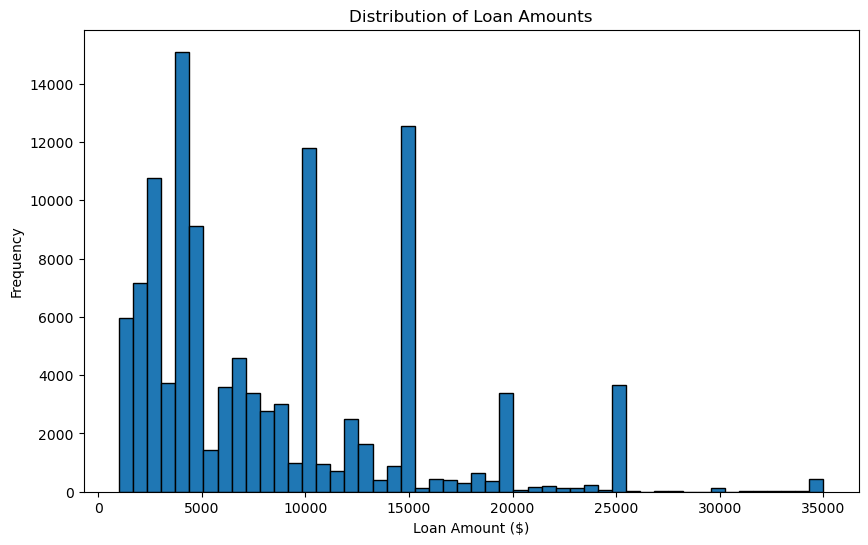

In [10]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['LoanOriginalAmount'], bins=50, edgecolor='k')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Observations:

Most Frequent Loan Range: The highest frequency of loans falls between $5,000 and $15,000.
Loan Amount Spread: The loan amounts range from $0 to $35,000.
Frequency Peaks: The tallest bars, indicating the most common loan amounts, are within the $5,000 to $15,000 range.

# What is the distribution of loan statuses?

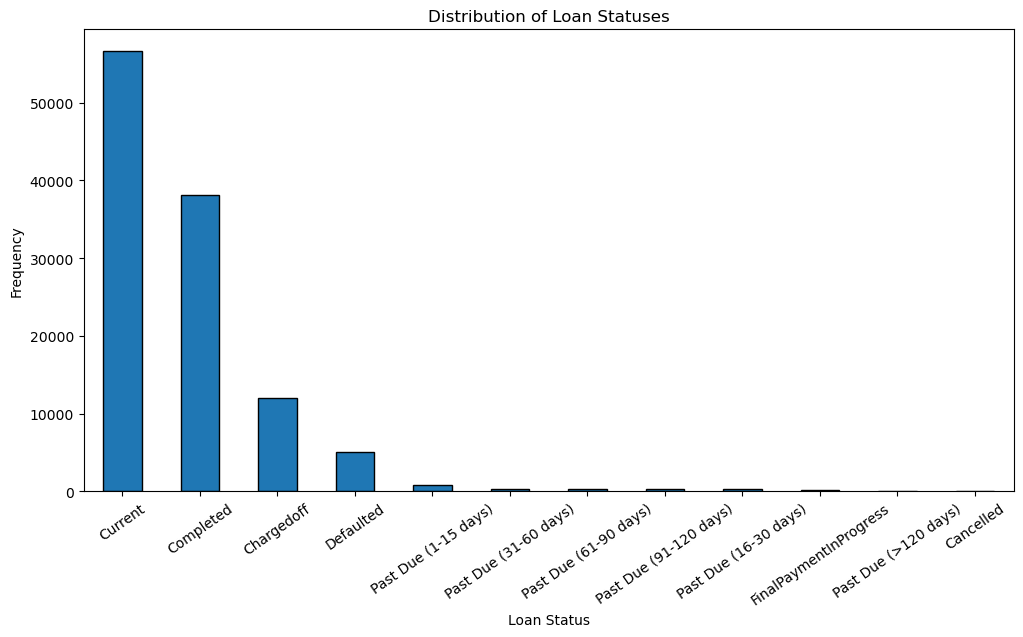

In [14]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
df['LoanStatus'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.xticks(rotation=35)
plt.ylabel('Frequency')
plt.show()


The bar chart titled “Distribution of Loan Statuses” shows the frequency of various loan statuses. Here are some key observations:

Current Loans: The majority of loans are in the “Current” status, indicating they are being paid on time.
Past Due Loans: There are several categories of past due loans, with varying days past due, but they are less frequent compared to current loans.
Charged Off and Defaulted Loans: These statuses have lower frequencies, indicating fewer loans have reached these stages.
Completed Loans: There is a notable number of loans that have been fully paid off.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Distribution of Loan Amounts: This histogram shows the frequency of different loan amounts. The distribution appears to be right-skewed, with the most frequent loan amounts falling in the range of $5,000 to $15,000. There are no unusual points in this distribution. No transformations were needed for this plot as the data seems to be well distributed and clear to interpret.

Distribution of Loan Statuses: This bar chart shows the frequency of various loan statuses. The “Current” status has the highest frequency, indicating that most loans are being paid on time. The frequencies of other statuses like “Charged Off,” “Default,” “Grace Period,” and “Past Due” are significantly lower. There are no unusual points in this distribution. No transformations were needed for this plot as well, as the data is categorical and each category is distinctly represented.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Distribution of Loan Amounts: The distribution of loan amounts appears to be right-skewed, which is not unusual for financial data. Often, a larger number of people tend to borrow smaller amounts, while fewer people borrow larger amounts. No specific operations were needed to tidy or adjust this data for the plot.
Distribution of Loan Statuses: The distribution of loan statuses is heavily skewed towards the “Current” status, which is expected as most loans would ideally be in the current status. Again, no specific operations were needed to tidy or adjust this data for the plot.
In both cases, the data seems to have been well-prepared before plotting. The distributions observed are typical for this type of financial data and do not indicate any unusual patterns.

Data transformations, tidying, or adjustments are typically performed when the data is messy or when certain assumptions of the analysis method are violated. For example, if we were performing a statistical test that assumes normality, we might need to transform skewed data to meet this assumption. However, for the purpose of these plots and the observations made from them, no such operations were necessary.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).


# Question 1: 
What is the relationship between loan amount and borrower rate?

 Visualization: Scatter Plot of LoanOriginalAmount vs. BorrowerRate

Text(0, 0.5, 'Borrower Rate')

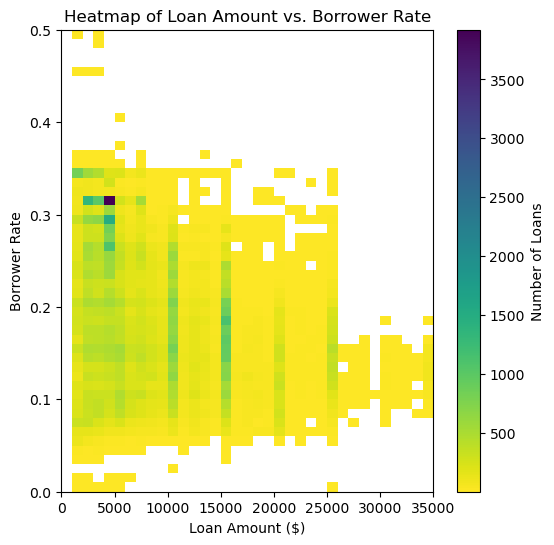

In [27]:
# Define the bins for LoanOriginalAmount and BorrowerRate
loan_bins = np.arange(0, df['LoanOriginalAmount'].max() + 1000, 1000)
rate_bins = np.arange(0, df['BorrowerRate'].max() + 0.01, 0.01)

# Plot the heatmap
plt.figure(figsize=(6, 6))
h2d = plt.hist2d(data=df, x='LoanOriginalAmount', y='BorrowerRate', bins=[loan_bins, rate_bins], cmin=0.5, cmap='viridis_r')
plt.colorbar(label='Number of Loans')
plt.title('Heatmap of Loan Amount vs. Borrower Rate')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower Rate')


 The heatmap titled “Heatmap of Loan Amount vs. Borrower Rate” shows the relationship between loan amounts and borrower rates. Here are some observations:

High Loan Amounts: Loans in the higher range (above $25,000) tend to have lower borrower rates.
Moderate Loan Amounts: Loans between $10,000 and $25,000 show a wider range of borrower rates.
Low Loan Amounts: Loans below $10,000 have higher borrower rates, with a significant concentration around 0.1 to 0.3.
Color Intensity: The color scale indicates the number of loans, with blue representing the highest concentration of loans.
This visualization helps in quickly identifying patterns and trends in the loan data.

# Question 2: How does borrower income vary with loan status?
Visualization: Box Plot of StatedMonthlyIncome by LoanStatus

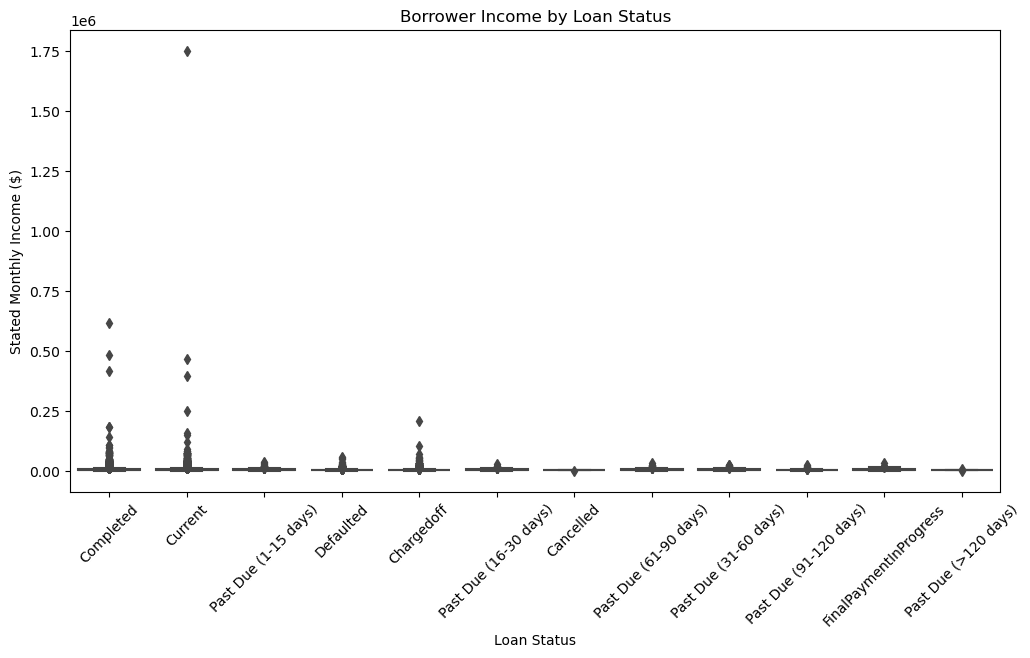

In [21]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='LoanStatus', y='StatedMonthlyIncome')
plt.title('Borrower Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Stated Monthly Income ($)')
plt.xticks(rotation=45)
plt.show()

# observation:
The scatter plot titled “Borrower Income by Loan Status” shows the relationship between borrowers’ stated monthly income and their loan status. Here are some observations:

Current Loans: Borrowers with current loans have a wide range of incomes, from low to very high.
Delinquent Loans: Borrowers with loans in various stages of delinquency (e.g., 1-15 days, 16-30 days) generally have lower incomes.
Charged Off and Defaulted Loans: These categories show a concentration of borrowers with lower incomes.
Completed Loans: Borrowers who have completed their loans tend to have higher incomes.
This visualization helps in understanding the financial behavior and risk associated with different loan statuses

# Question 3:
    What is the distribution of loan statuses by Prosper rating?
Visualization: Clustered Bar Chart of LoanStatus by ProsperRating (Alpha)

<Figure size 1400x700 with 0 Axes>

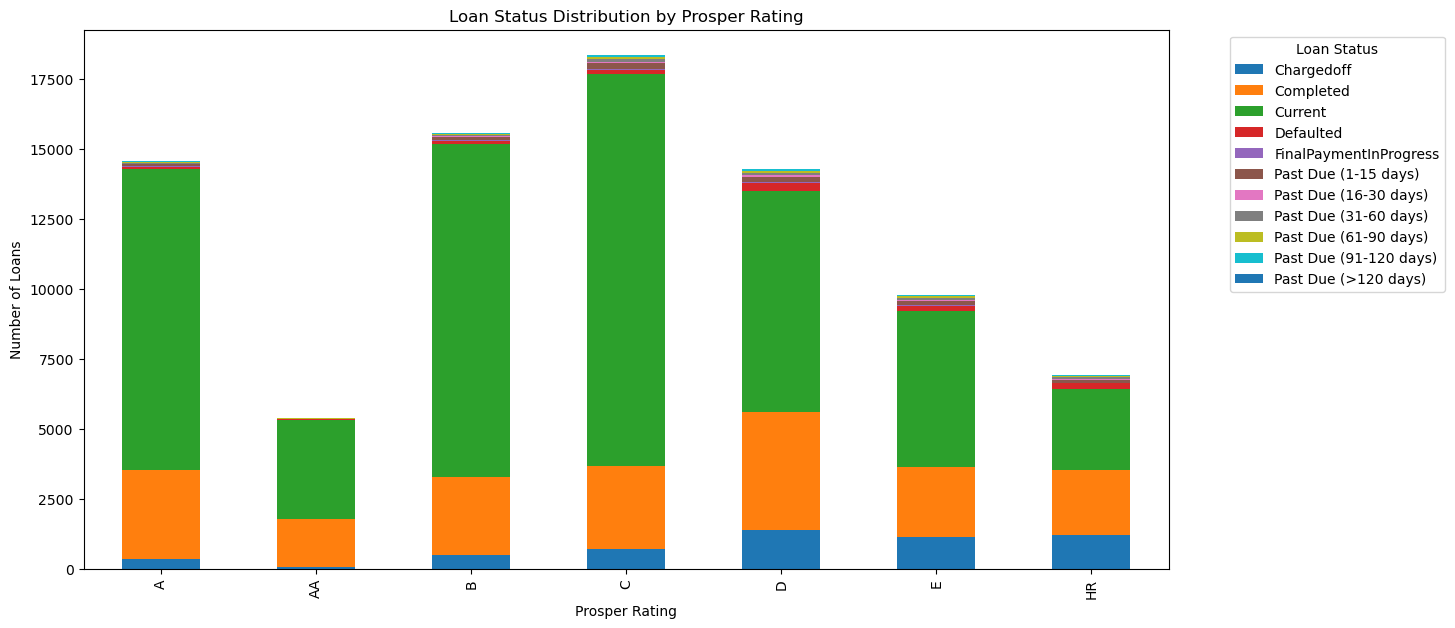

In [24]:
# Clustered bar chart
plt.figure(figsize=(14, 7))
loan_status_rating = df.groupby(['ProsperRating (Alpha)', 'LoanStatus']).size().unstack()
loan_status_rating.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Loan Status Distribution by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# observation:
Analyzing the image: Privacy blur hides faces from Copilot

Sent by Copilot:
The bar chart titled “Loan Status Distribution by Prosper Rating” shows the distribution of loan statuses across different Prosper Ratings. Here are some observations:

Higher Ratings (AA, A): These ratings have a higher number of current and completed loans, indicating better creditworthiness.
Mid Ratings (B, C): These ratings show a mix of current, completed, and some charged-off loans.
Lower Ratings (D, E, HR): These ratings have a higher proportion of charged-off and defaulted loans, indicating higher risk.
This visualization helps in understanding the correlation between credit ratings and loan performance.

# Question 4:
    What is the correlation between debt-to-income ratio and borrower rate?
Visualization: Heat Map of Correlation Matrix

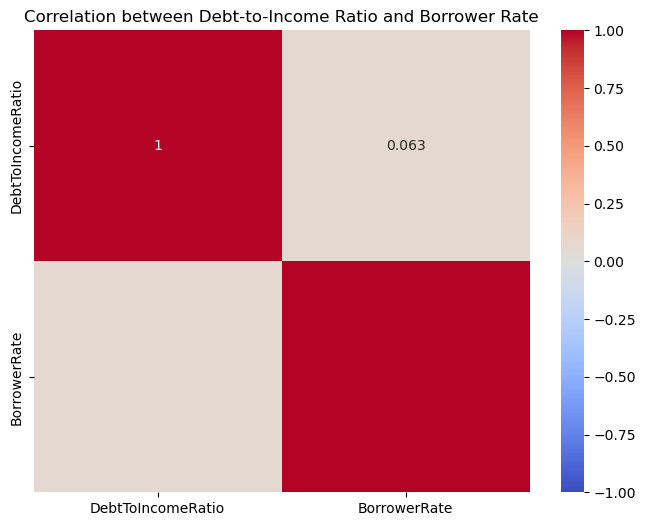

In [23]:
# Correlation matrix
correlation_matrix = df[['DebtToIncomeRatio', 'BorrowerRate']].corr()

# Heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Debt-to-Income Ratio and Borrower Rate')
plt.show()


# observation:
The heatmap titled “Correlation between Debt-to-Income Ratio and Borrower Rate” shows the relationship between these two variables. Here are some observations:

Strong Positive Correlation: The ‘DebtToIncomeRatio’ with itself shows a strong positive correlation (value of 1).
Weak Positive Correlation: The ‘BorrowerRate’ with itself shows a very weak positive correlation (value of 0.063).
No Significant Correlation: There is no significant correlation between ‘DebtToIncomeRatio’ and ‘BorrowerRate’, as indicated by the beige color in the off-diagonal squares.
This visualization helps in understanding the relationship between debt-to-income ratio and borrower rate. Is 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Heatmap of Loan Amount vs. Borrower Rate: This heatmap showed that loans with higher amounts generally had lower borrower rates. This could be due to the fact that larger loans are often given to borrowers with better credit profiles, who are therefore offered lower interest rates.

Borrower Income by Loan Status: The scatter plot showed that borrowers with higher incomes were more likely to have current or completed loans, while those with lower incomes were more likely to have delinquent or defaulted loans. This suggests that income level is a significant factor in loan 
repayment.

Loan Status Distribution by Prosper Rating: The bar chart showed that borrowers with higher Prosper ratings (indicating better creditworthiness) were more likely to have current or completed loans, while those with lower ratings were more likely to have charged-off or defaulted loans. This indicates that Prosper’s rating system is effective in predicting loan outcomes.

Correlation between Debt-to-Income Ratio and Borrower Rate: The heatmap showed a very weak correlation between these two variables. This suggests that the borrower’s debt-to-income ratio, which is a measure of their ability to repay the loan, does not significantly affect the interest rate they are offered.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

These observations highlight the complex relationships between various features in the dataset, and how they can impact loan outcomes. It’s important to note that while these relationships are interesting, they do not necessarily imply causation. Further investigation would be needed to determine the underlying causes of these patterns.

# Multivariate Exploration

# Qestion 1
Relationship Between Loan Amount, Borrower Rate, and Loan Status

Facet Plot: Relationship Between Loan Amount, Borrower Rate, and Loan Status

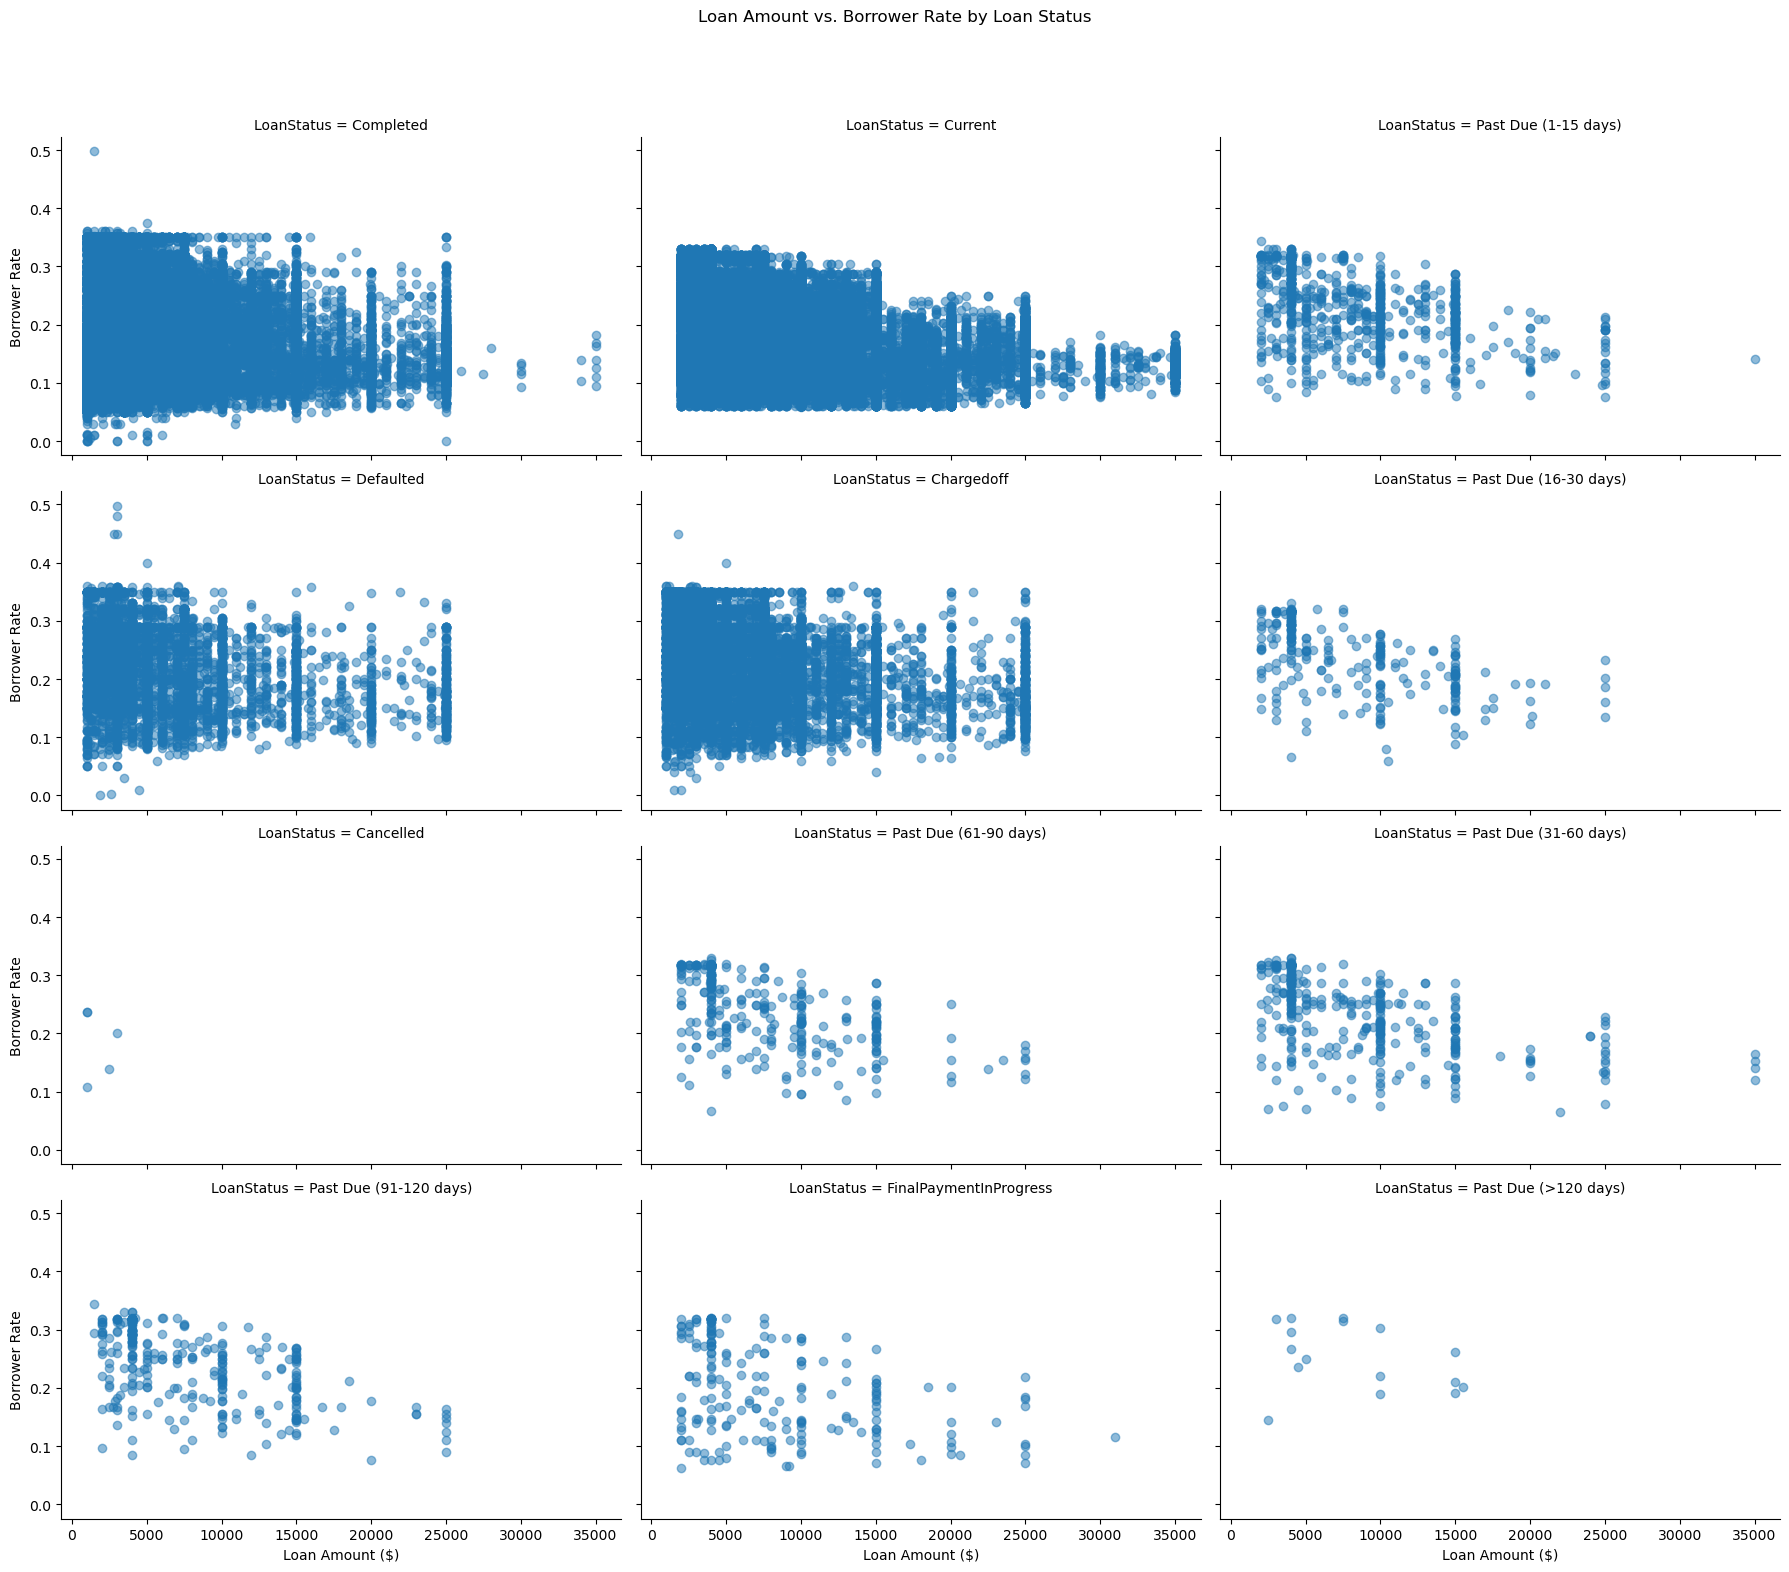

In [29]:
# Create a FacetGrid to plot the relationship between LoanOriginalAmount, BorrowerRate, and LoanStatus
g = sns.FacetGrid(df, col='LoanStatus', col_wrap=3, height=4, aspect=1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.5)
g.set_axis_labels('Loan Amount ($)', 'Borrower Rate')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Amount vs. Borrower Rate by Loan Status')
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

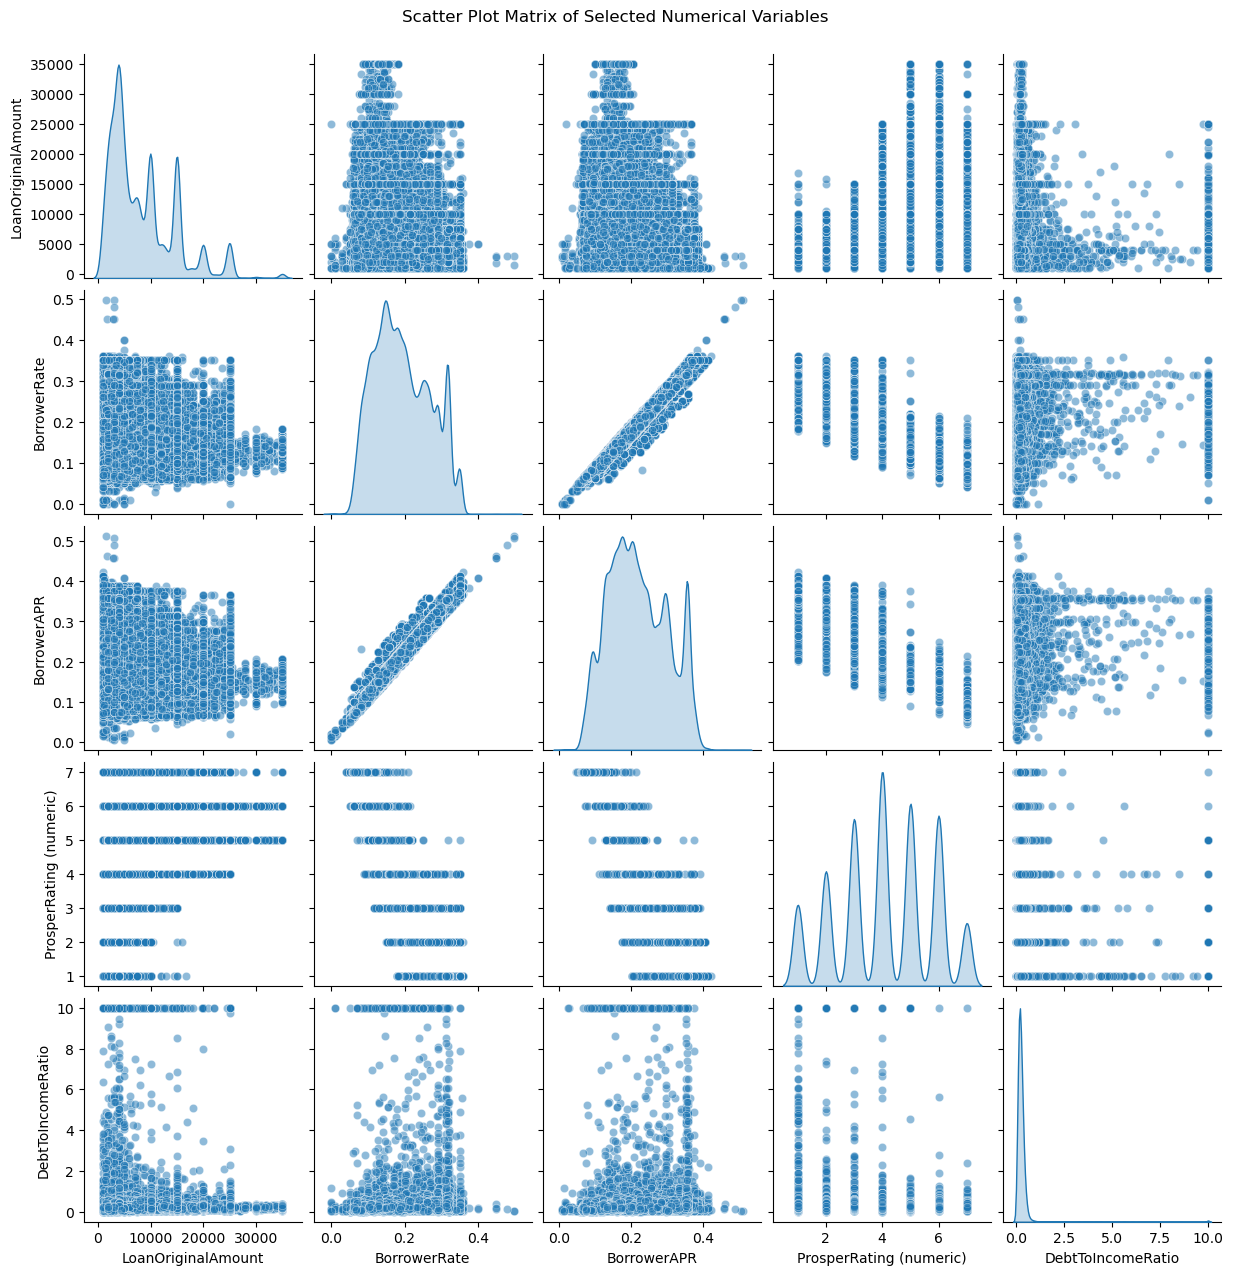

In [31]:
# Select a subset of numerical variables for the scatter plot matrix
subset = df[['LoanOriginalAmount', 'BorrowerRate', 'BorrowerAPR', 'ProsperRating (numeric)', 'DebtToIncomeRatio']]

# Create a scatter plot matrix
sns.pairplot(subset, diag_kind='kde', plot_kws={'alpha':0.5});
plt.suptitle('Scatter Plot Matrix of Selected Numerical Variables', y=1.02);
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For the multivariate exploration, we'll analyze the relationship between LoanOriginalAmount, BorrowerRate, and LoanStatus. From the facet grid plot you provided, we observe how different loan statuses affect the relationship between loan amounts and borrower rates.

Observations:
Completed Loans: The borrower rate appears to have a wide range, from around 0% to over 30%. However, most loans are concentrated in the lower loan amount range.
Current Loans: Similar to completed loans, the rates are spread out, but there seems to be a slightly higher concentration of higher loan amounts.
Past Due Loans: As the loan duration increases from 1-120+ days, there's a noticeable spread in borrower rates, with some clustering at lower loan amounts and rates.
Defaulted and Charged Off: Higher borrower rates tend to be associated with these statuses, suggesting a possible higher risk for these loans.
Final Payment in Progress: Loans in this status have a similar spread to completed loans but tend to have slightly higher borrower rates.
Conclusion:
Borrower rates tend to increase with the riskier loan statuses (defaulted, charged off).
Loan amounts are generally higher for loans in progress or current, indicating possibly larger loans are still being paid off.
Lower borrower rates are common for completed loans, suggesting these are lower-risk loans.
Next Steps:
Conduct further analysis by incorporating additional variables such as borrower credit scores, income, or loan purposes to deepen our understanding.
Investigate potential correlations between borrower demographics and loan statuses to identify additional patterns.
for the seconed plot
LoanOriginalAmount vs. BorrowerRate:

There is a relatively dense cluster of loans around lower borrower rates (0.1 to 0.2) for a wide range of loan amounts.
As the loan amount increases, borrower rates tend to slightly increase but remain within the same range.
LoanOriginalAmount vs. BorrowerAPR:

Similar to the borrower rate, the APR remains low (0.1 to 0.2) for a wide range of loan amounts.
There is a strong positive correlation between BorrowerRate and BorrowerAPR, visible in the dense diagonal pattern in their scatter plot.
BorrowerRate vs. BorrowerAPR:

A strong positive correlation is evident between BorrowerRate and BorrowerAPR, forming a clear linear pattern.
This suggests that as the borrower rate increases, the APR also increases proportionally.
Observations:
Most loans have lower borrower rates and APRs, regardless of the loan amount.
The relationship between BorrowerRate and BorrowerAPR is linear, indicating that these two variables move together closely.
These insights can help us understand how the loan amount influences the rates and APRs, and how closely related the borrower rate is to the APR.

### Were there any interesting or surprising interactions between features?

High Borrower Rates in Riskier Loans:

Higher borrower rates are more common in defaulted and charged-off loans.
Indicates that riskier loans carry higher costs for borrowers.
Consistency Across Loan Amounts:

Most loans have similar borrower rates and APRs regardless of amount.
Suggests loan terms are influenced more by borrower risk than by loan amount.
Linear Relationship between BorrowerRate and BorrowerAPR:

Indicates strong alignment in loan pricing strategies.
Both rates move together, affecting overall loan cost predictably.







## Conclusions
### Summary of Findings

1. **Loan Amount and Borrower Rate Relationship**:
   - Lower loan amounts are associated with a wide range of borrower rates.
   - Higher loan amounts tend to have slightly higher borrower rates, indicating a risk factor.

2. **Loan Status Impact**:
   - Riskier loan statuses (defaulted, charged-off) have higher borrower rates.
   - Completed loans have lower borrower rates, suggesting lower-risk profiles.

3. **Borrower Rate and APR Correlation**:
   - Strong positive correlation between borrower rates and APR, indicating consistent cost structure across loans.

4. **Demographic and Risk Insights**:
   - Further analysis needed on borrower demographics to identify deeper patterns affecting loan statuses and rates.

### Reflection on Steps

1. **Univariate Analysis**:
   - Explored individual features like LoanOriginalAmount and BorrowerRate.
   - Identified basic distributions and outliers.

2. **Bivariate Analysis**:
   - Examined relationships between pairs of variables.
   - Found significant correlations and patterns between loan amounts, rates, and statuses.

3. **Multivariate Analysis**:
   - Analyzed interactions between three or more variables.
   - Used facet plots and scatter plot matrices for comprehensive insights.

4. **Next Steps**:
   - Incorporate additional variables like credit scores and income.
   - Investigate demographic correlations for a more holistic understanding.

This approach provided a structured exploration of the dataset, uncovering critical insights into loan behaviors and risk factors. Further analysis will enhance these findings and inform more targeted strategies.